## Working with microbiome data

### Imports and datasets for easy access:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from matplotlib.colors import ListedColormap

OTUcounts = "../hurwitzlab/data_sets/HMP_V13_OTU_counts.csv"
# (2898, 43141) dimensions of OTUcounts
participants = "../hurwitzlab/data_sets/HMP_V13_participant_data.csv" #5 body sites
taxonomy = "../hurwitzlab/data_sets/HMP_V13_taxonomy.csv"

### Body site clusters

In [10]:
bs = pd.read_csv(participants)

body_site_mapping = {site: idx for idx, site in enumerate(bs['HMP_BODY_SITE'].unique())}

body_site_ints = bs['HMP_BODY_SITE'].map(body_site_mapping)

print(body_site_ints)

0       0
1       0
2       1
3       1
4       1
       ..
2893    4
2894    4
2895    0
2896    3
2897    2
Name: HMP_BODY_SITE, Length: 2898, dtype: int64


## Dimensionality Reduction
### Using PCA:

/var/folders/mr/fcr4_q2x7r92n0ld8cqw51g00000gn/T/ipykernel_12684/420751444.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(result[:, 0], result[:, 1], cmap=plt.cm.nipy_spectral, s= 10)


<function matplotlib.pyplot.show(close=None, block=None)>

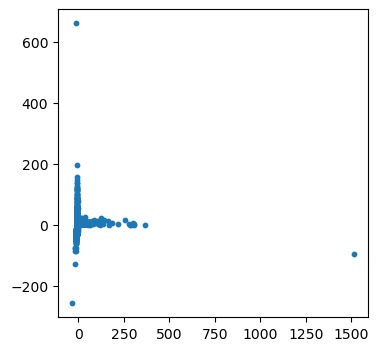

In [11]:
df = pd.read_csv(OTUcounts)
df = df.drop(columns = ['PSN'])

#Standardize data
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

#Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform(scaled_df)

#Plot
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.scatter(result[:, 0], result[:, 1], cmap=plt.cm.nipy_spectral, s= 10)
plt.savefig("pca.svg")
plt.show

## Using t-distributed Stochastic Neighbor Embedding:

/opt/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

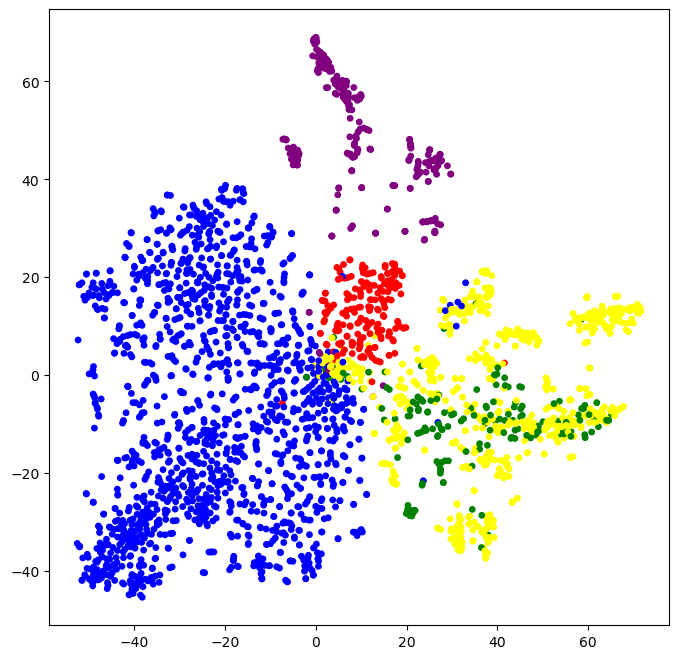

In [12]:
#Perform TSNE
tsne = TSNE(n_components=2, init='pca',
        random_state = 0)
result = tsne.fit_transform(df)

# Clustering using spectral
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
clusters = spectral.fit_predict(result)

# Plot
custom_colors = ['red', 'blue', 'green', 'yellow', 'purple']
cmap = ListedColormap(custom_colors)

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=clusters, cmap=cmap, s=15)
plt.savefig("tsne.svg")
plt.show

# Plot with body sites
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=body_site_ints, cmap=cmap, s=15)
plt.savefig("body_site_tsne.svg")
plt.show


## Reducing dimensionality before and after clustering for better results

### With Spectral Clustering:

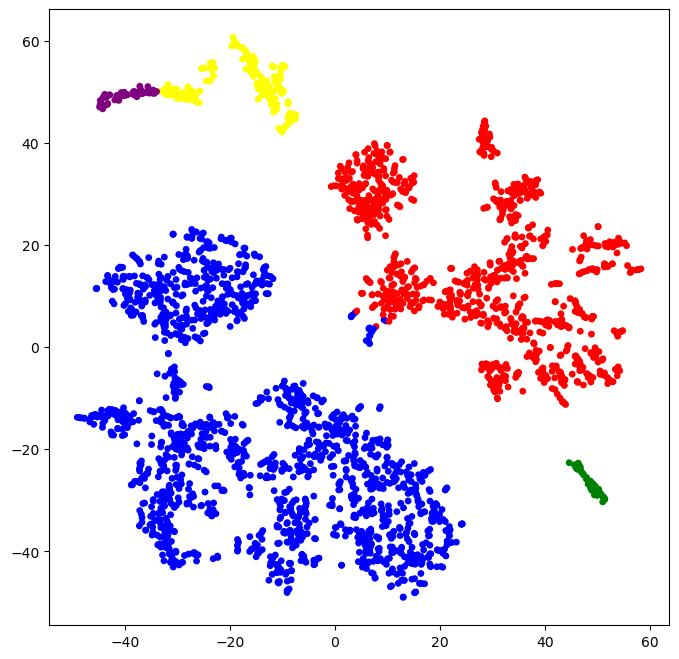

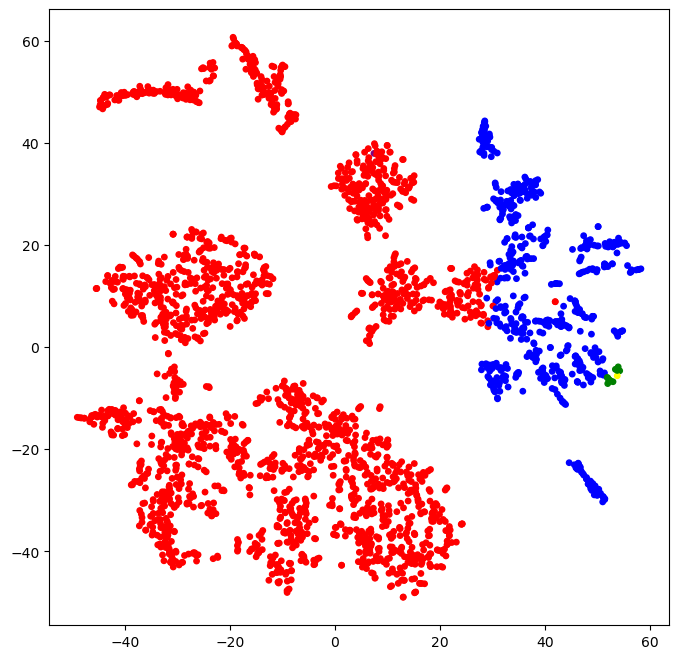

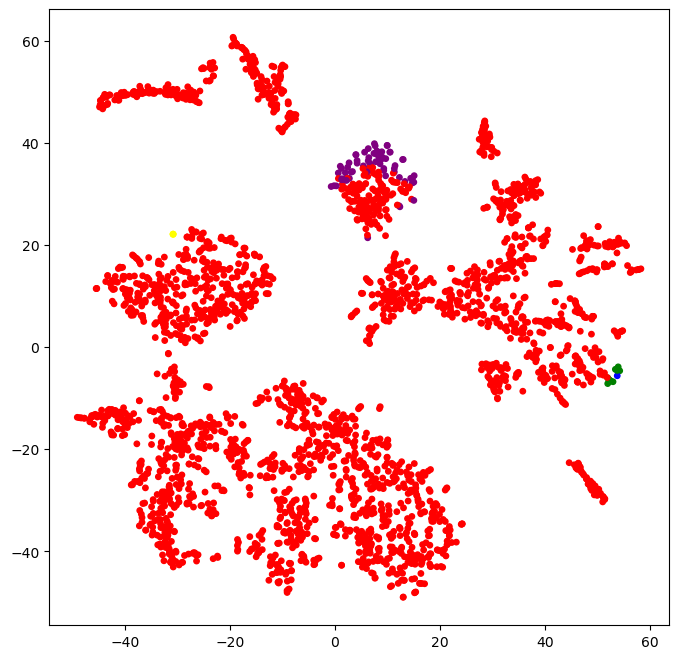

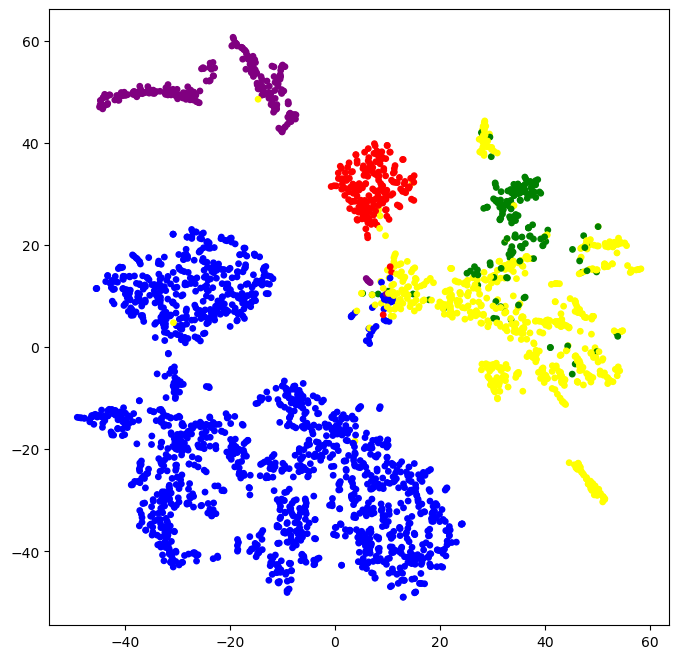

In [13]:
df = pd.read_csv(OTUcounts)
df = df.drop(columns = ['PSN'])

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Initial dimensionality reduction
pca = PCA(n_components=50)
reduced_df = pca.fit_transform(scaled_df)

# Clustering using spectral
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
sClusters = spectral.fit_predict(reduced_df)

#Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=5)
hClusters = hierarchical.fit_predict(reduced_df)

#KMeans
kmeans = KMeans(n_clusters=5)
kClusters = kmeans.fit_predict(reduced_df)

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(reduced_df)

# Plot
custom_colors = ['red', 'blue', 'green', 'yellow', 'purple']
cmap = ListedColormap(custom_colors)

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=sClusters, cmap=cmap, s=15)
plt.savefig("spectral_tsne.svg")
plt.show()

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=hClusters, cmap=cmap, s=15)
plt.savefig("hierarchical_tsne.svg")
plt.show()

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=kClusters, cmap=cmap, s=15)
plt.savefig("kmeans_tsne.svg")
plt.show()

# Plot with body sites
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=body_site_ints, cmap=cmap, s=15)
plt.savefig("body_site_two_clustered_tsne.svg")
plt.show()

### MDS (PCoA) instead of tsne

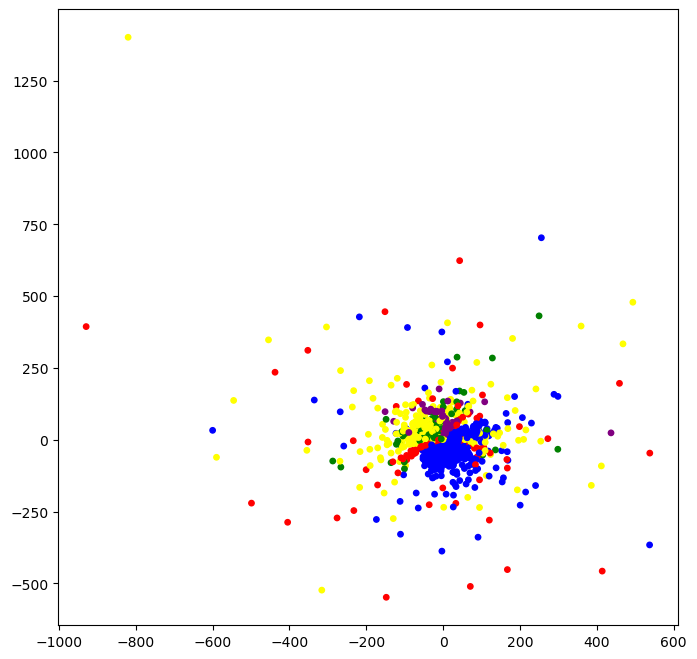

In [14]:
# Dimensionality reduction for visualization
mds = MDS(n_components=2, random_state=0)
result = mds.fit_transform(reduced_df)

# Plot
custom_colors = ['red', 'blue', 'green', 'yellow', 'purple']
cmap = ListedColormap(custom_colors)

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=body_site_ints, cmap=cmap, s=15)
plt.savefig("body_site_pcoa.svg")
plt.show()

## Hierarchical

## Kmeans